In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
import random
import re
import os

In [4]:
print("Tensorflow Version",tf.__version__)
df = pd.read_csv('sentiment140.csv', encoding='latin', header=None)
df.head()

Tensorflow Version 2.18.0


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [14]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

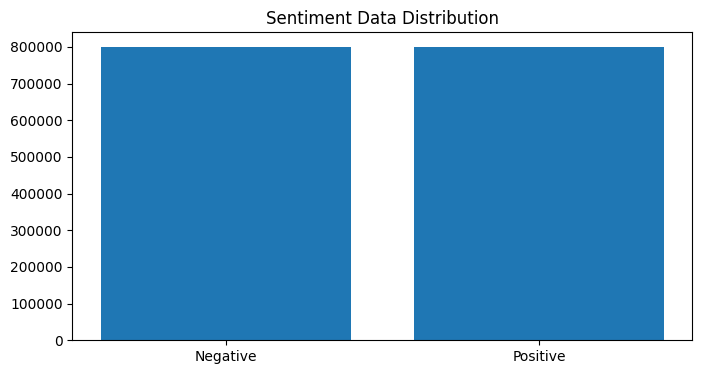

In [15]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [16]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10)

,sentiment,text
134224,Negative,Going to do my homework
1220415,Positive,"Going to get out of bed now, eat then hit the ..."
1097253,Positive,Just got a new pair of see-pectacles. Its gett...
1197875,Positive,"@animatedme 'A 10 ten minute', eh? That sound..."
210339,Negative,There are more bad things about turning 18 tha...
1388637,Positive,"Can't sleep, listening to Rascal Flatts, worki..."
1529069,Positive,school's still okay though. i can do this.
684218,Negative,isn't sleepin too well.....
841598,Positive,@SusanB272 I'm not sure what to think of her!
8578,Negative,"Well, @LilWO was having a tough day/night. Wan..."


In [18]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\manik\AppData\Local\Temp\ipykernel_15132\3341848437.py:4: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [19]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [20]:
df.text = df.text.apply(lambda x: preprocess(x))

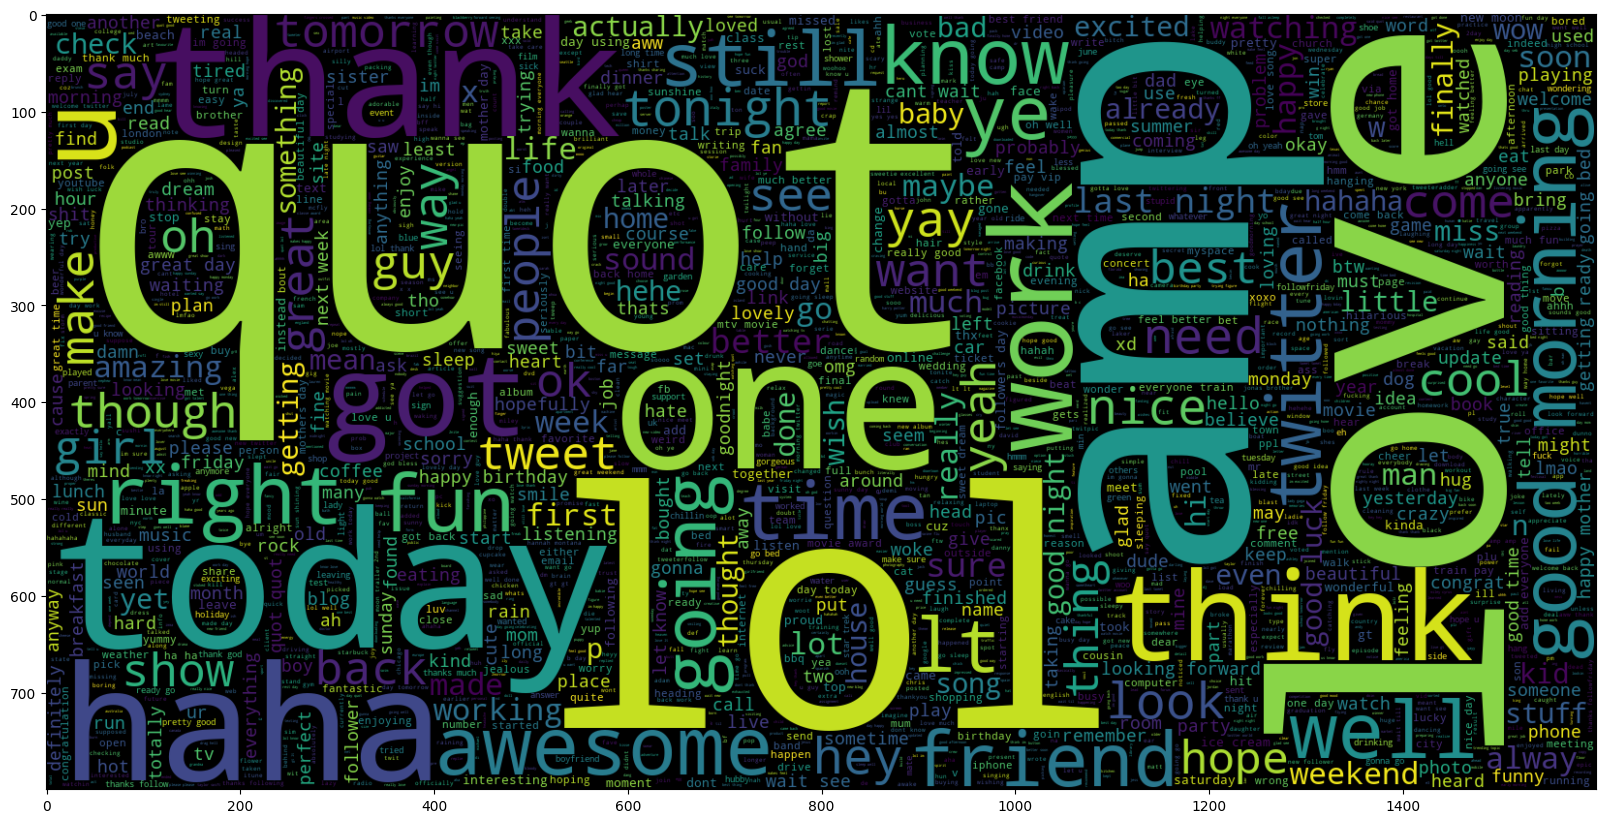

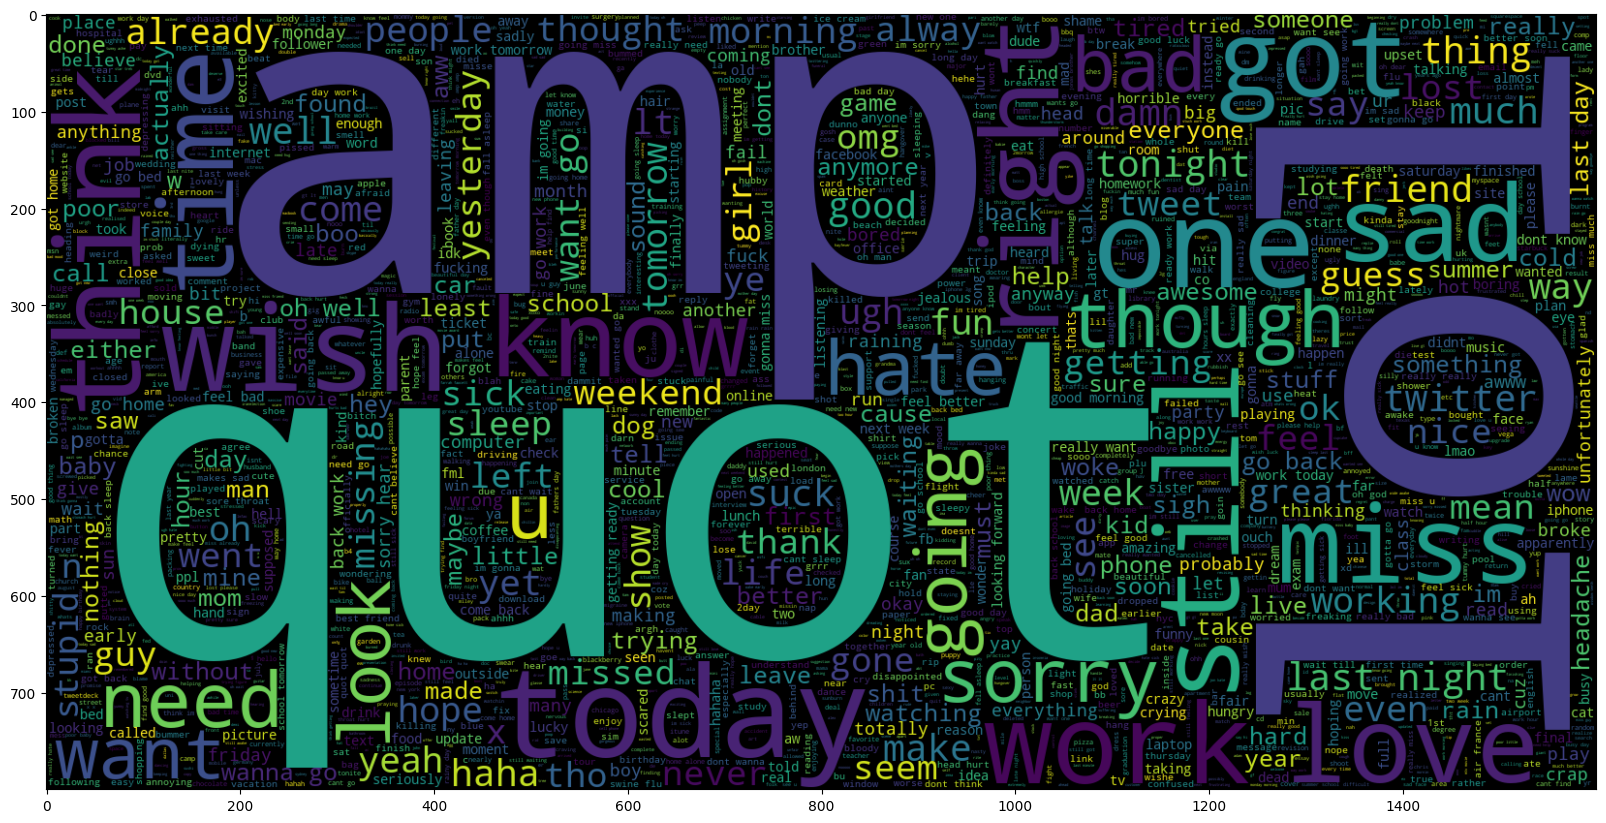

In [21]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')


plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [22]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30


In [23]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [24]:
labels = train_data.sentiment.unique().tolist()

In [25]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [27]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [39]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [40]:
print(x_test)

[[    0     0     0 ...  1147   934   546]
 [    0     0     0 ...  5739   245 33694]
 [    0     0     0 ...   967   954  3509]
 ...
 [    0     0     0 ...   933   619  1902]
 [    0     0     0 ...  6699   458   317]
 [    0     0     0 ...  1825    12   692]]


In [41]:
import requests
import zipfile
import os

In [21]:
url = "http://nlp.stanford.edu/data/glove.6B.zip"
output_file = "glove.6B.zip"
response = requests.get(url, stream=True)
with open(output_file, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)
print("Download complete!")
with zipfile.ZipFile(output_file, "r") as zip_ref:
    zip_ref.extractall("glove")
print("Extraction complete!")
os.remove(output_file)
print("Cleaned up zip file.")

Download complete!
Extraction complete!
Cleaned up zip file.


In [42]:
GLOVE_EMB = 'glove.6B.300d.txt'

EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'


In [43]:
embeddings_index = {}

f =  open(GLOVE_EMB,encoding='utf-8')
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [44]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [45]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [47]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [49]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [1]:

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

NameError: name 'model' is not defined

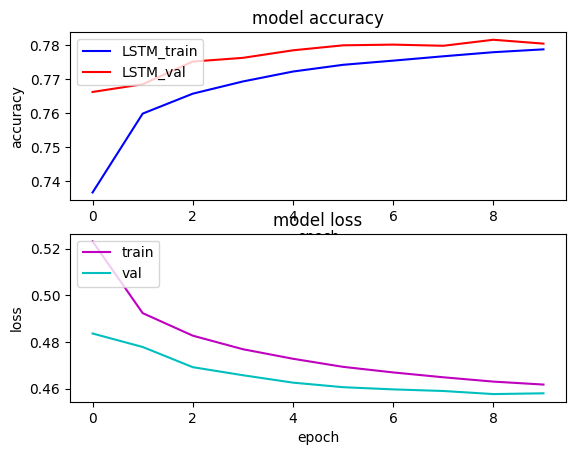

In [40]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [41]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 580ms/step


In [42]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

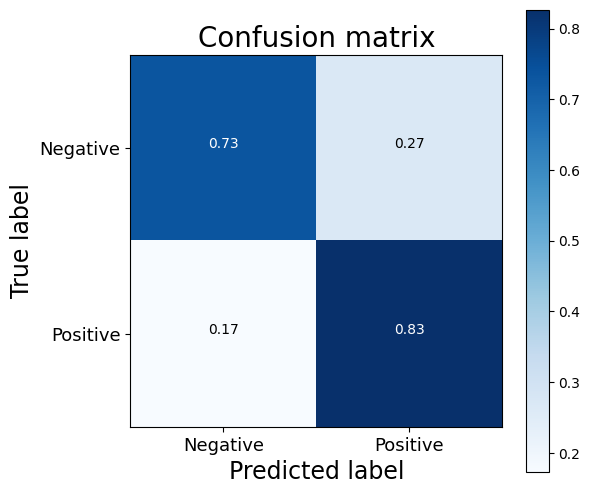

In [43]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [44]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.81      0.73      0.77    160542
    Positive       0.76      0.83      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [45]:
df.shape

(1600000, 2)

In [46]:
df['sentiment'].value_counts()

sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64

In [47]:
from nltk.stem import PorterStemmer
port_steam = PorterStemmer()

In [48]:
def stemming(content):
    stemmer = nltk.SnowballStemmer('english')
    stemmed_content = content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [49]:
X = df['text'].values
Y = df['sentiment'].values

In [50]:
print(X)

['awww bummer shoulda got david carr third day'
 'upset update facebook texting might cry result school today also blah'
 'dived many times ball managed save 50 rest go bounds' ...
 'ready mojo makeover ask details'
 'happy 38th birthday boo alll time tupac amaru shakur'
 'happy charitytuesday thenspcc sparkscharity speakinguph4h']


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [53]:
print(X_train)
print(Y_train)

['watch saw iv drink lil wine' ''
 'even though favourite drink think vodka coke wipes mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyone mother great day wait hear guys store tomorrow'
 'love waking folgers bad voice deeper']
['Positive' 'Positive' 'Negative' ... 'Positive' 'Positive' 'Negative']


In [54]:
print(X_train)

['watch saw iv drink lil wine' ''
 'even though favourite drink think vodka coke wipes mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyone mother great day wait hear guys store tomorrow'
 'love waking folgers bad voice deeper']


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
print(type(X_train))

<class 'numpy.ndarray'>


In [57]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [58]:
print(X_test)

  (0, 17039)	0.17977998616652127
  (0, 26494)	0.17007821036158058
  (0, 50289)	0.29282433634923427
  (0, 74507)	0.45272899340994094
  (0, 91880)	0.2674303113452972
  (0, 96188)	0.24782966679820204
  (0, 119417)	0.294686709004799
  (0, 173018)	0.1862739288414861
  (0, 244461)	0.2305710944102268
  (0, 251398)	0.43490413383906834
  (0, 256368)	0.3387266155655809
  (0, 264569)	0.19111729905948865
  (1, 13164)	0.5375757538742224
  (1, 17039)	0.184520696116258
  (1, 101321)	0.5025922488779689
  (1, 141052)	0.360807908114163
  (1, 161661)	0.2516604423610024
  (1, 218331)	0.42483418109419807
  (1, 229145)	0.22442381042591567
  (2, 20846)	0.43833540505980706
  (2, 29136)	0.4668687679266717
  (2, 65157)	0.4463571237373774
  (2, 161701)	0.3156896439352119
  (2, 252520)	0.5394450787676547
  (3, 82728)	0.6772236223440107
  :	:
  (319994, 255130)	0.21287125033834722
  (319994, 276234)	0.21273053309716666
  (319994, 281117)	0.2620725423705306
  (319995, 75660)	0.34190388197718785
  (319995, 76618)	0.

In [59]:
print(X_train)

  (0, 275839)	0.31944928864833405
  (0, 221668)	0.34523656763312527
  (0, 128479)	0.5133275369633379
  (0, 76521)	0.4028542458897644
  (0, 150166)	0.40629665547401433
  (0, 280571)	0.4334630185671485
  (2, 76521)	0.4812885002549207
  (2, 85599)	0.18366319747759238
  (2, 255130)	0.17579241905853688
  (2, 89700)	0.2763364825678844
  (2, 254662)	0.31578763334534543
  (2, 273357)	0.31058399174652385
  (2, 56265)	0.2955436623422368
  (2, 280833)	0.38985869781065874
  (2, 166847)	0.22991273351334396
  (2, 256368)	0.1470117211584014
  (2, 123327)	0.15335816265219668
  (2, 104648)	0.1766787536873268
  (2, 91846)	0.19429089725279367
  (2, 178784)	0.15776217957576427
  (3, 254662)	0.28617375135973083
  (3, 110794)	0.4836950796326333
  (3, 105520)	0.26284185656975323
  (3, 43393)	0.4899700016399023
  (3, 244699)	0.3726900824740739
  :	:
  (1279996, 198116)	0.22403186424931995
  (1279996, 273695)	0.27347710693644417
  (1279996, 245737)	0.2076875360138085
  (1279996, 233879)	0.415831525087409
  (12

In [60]:
import pickle

# Save the model
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))



In [30]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [31]:
def preprocess(text, stem=False):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\manik\AppData\Local\Temp\ipykernel_15132\1460555962.py:2: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [32]:
custom_text = "I really love this product! It’s amazing."

# Preprocess the text
cleaned_text = preprocess(custom_text)

# Tokenize and pad the text
custom_text_sequence = tokenizer.texts_to_sequences([cleaned_text])  # Tokenize
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=MAX_SEQUENCE_LENGTH)  # Pad

In [37]:
score = model.predict(custom_text_padded)

# Decode the sentiment
predicted_sentiment = decode_sentiment(score[0][0])

# Output the result
print(f"Custom Text: {custom_text}")
print(f"Predicted Sentiment: {predicted_sentiment} (Score: {score[0][0]})")

NameError: name 'model' is not defined

In [28]:
# Load the tokenizer from the file
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

def predict_sentiment(custom_text, tokenizer, model, max_sequence_length=50):
    # Preprocess the input text
    cleaned_text = preprocess(custom_text)

    # Tokenize and pad the input text to match model input
    custom_text_sequence = tokenizer.texts_to_sequences([cleaned_text])
    custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_sequence_length)

    # Predict sentiment
    score = model.predict(custom_text_padded)

    # Decode the sentiment
    pos_score = score[0][0]
    neg_score = 1 - score[0][0]

    positive_percent =  pos_score * 100
    negitive_percent =  neg_score * 100

    def decode_sentiment(score):
        return "Positive" if score > 0.5 else "Negative"

    predicted_sentiment = decode_sentiment(score[0][0])

    # Output the result
    return {
        'custom_text': custom_text,
        'predicted_sentiment': predicted_sentiment,
        'positive_percent': positive_percent,
        'negitive_percent' : negitive_percent
    }

In [29]:
# custom_input = "The product arrived on time, and the packaging was great, but it doesn’t work as advertised. Really disappointed. 😕 #MixedFeelings"
custom_input ="i love you my country"
result = predict_sentiment(custom_input, tokenizer, model)
 
print(f"input: {result['custom_text']}")
print(f"output: {result['predicted_sentiment']}")
print(f"Percent positive : {result['positive_percent']:.2f}%")
print(f"Percent negative : {result['negitive_percent']:.2f}%")




NameError: name 'model' is not defined